In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [82]:
data = pd.read_csv('final_data.csv').copy()

create data for each variant

In [83]:
alpha_data = data[data['variant'] == 'Alpha']
alpha_data.drop('variant', axis=1, inplace=True)
alpha_data.describe()

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,num_sequences,perc_sequences,num_sequences_total
count,42.000000,42.000000,42.000000,42.000000
mean,82.000000,109.380952,28.936905,420.190476
std,49.071377,205.845781,41.275118,561.511342
min,0.000000,0.000000,0.000000,1.000000
25%,41.000000,0.000000,0.000000,3.250000
50%,82.000000,0.000000,0.000000,179.500000
75%,123.000000,72.000000,74.395000,618.250000
max,164.000000,683.000000,99.700000,2290.000000


In [84]:
delta_data = data[data['variant'] == 'Delta']
delta_data.drop('variant', axis=1, inplace=True)
delta_data.head()

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,date,num_sequences,perc_sequences,num_sequences_total
2,2,2020-05-11,0,0.0,3
6,6,2020-05-25,0,0.0,1
10,10,2020-07-06,0,0.0,2
14,14,2020-07-20,0,0.0,1
18,18,2020-08-03,0,0.0,1


In [85]:
beta_data = data[data['variant'] == 'Beta']
beta_data.drop('variant', axis=1, inplace=True)
beta_data.head()

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,date,num_sequences,perc_sequences,num_sequences_total
1,1,2020-05-11,0,0.0,3
5,5,2020-05-25,0,0.0,1
9,9,2020-07-06,0,0.0,2
13,13,2020-07-20,0,0.0,1
17,17,2020-08-03,0,0.0,1


In [86]:
omicron_data = data[data['variant'] == 'Omicron']
omicron_data.drop('variant', axis=1, inplace=True)
omicron_data.head()

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,date,num_sequences,perc_sequences,num_sequences_total
3,3,2020-05-11,0,0.0,3
7,7,2020-05-25,0,0.0,1
11,11,2020-07-06,0,0.0,2
15,15,2020-07-20,0,0.0,1
19,19,2020-08-03,0,0.0,1


vizualize data

C:\Users\julia\AppData\Local\Temp/ipykernel_18052/2381508880.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


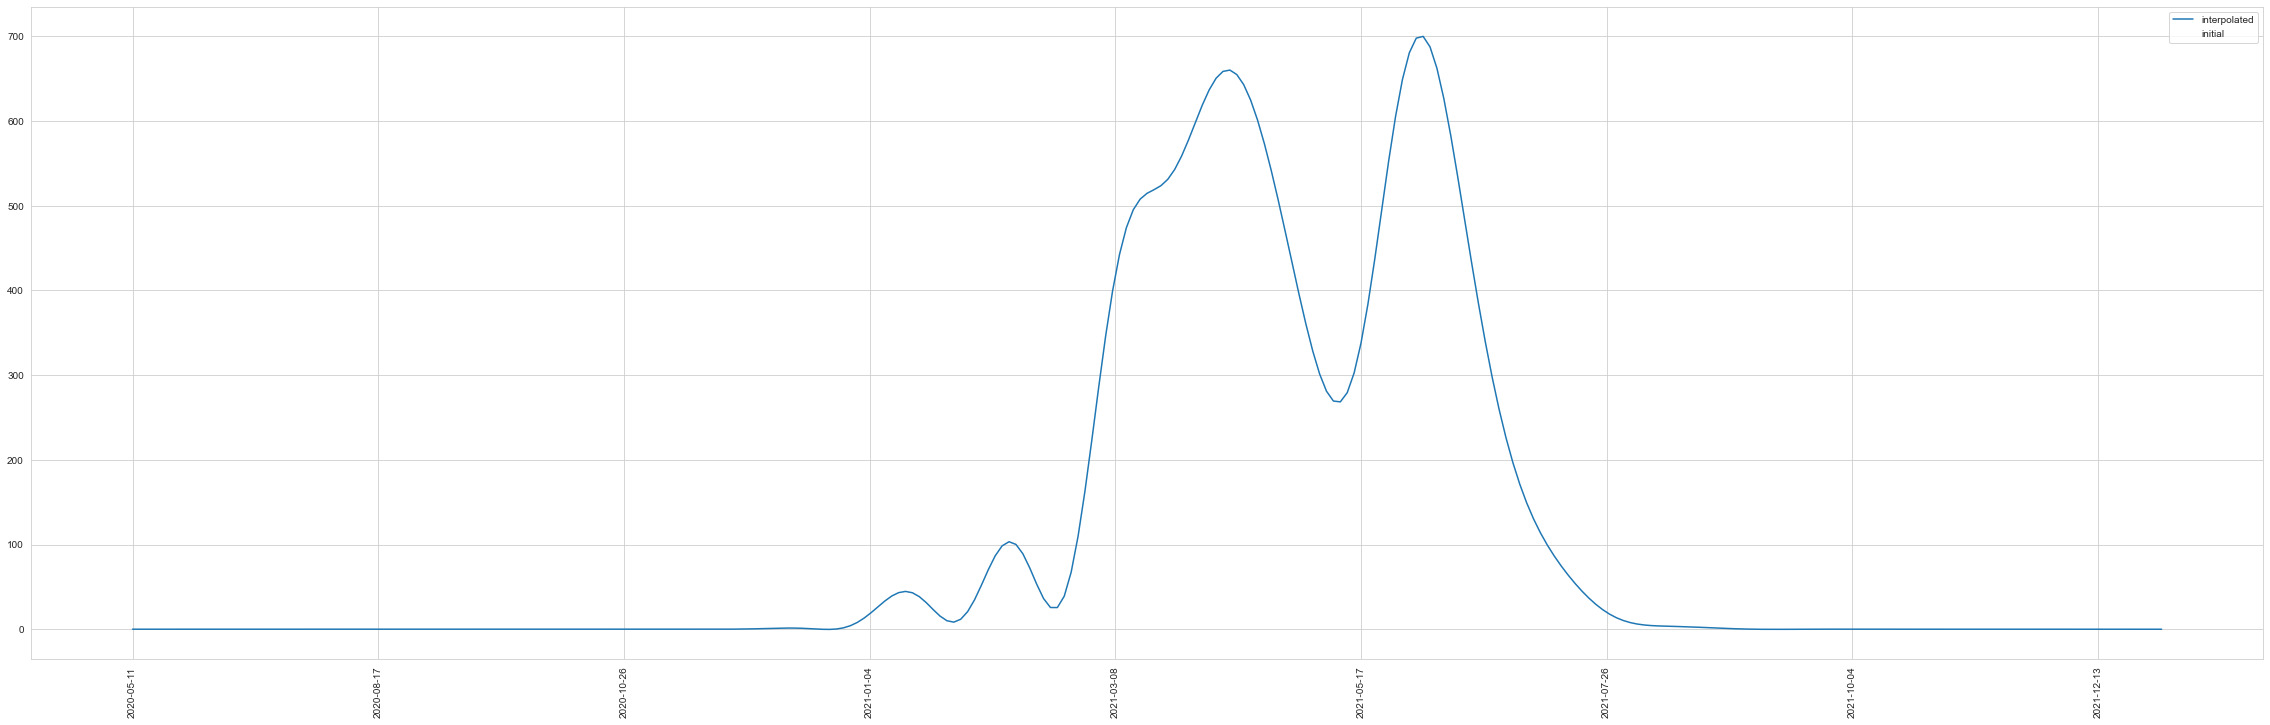

In [87]:
%matplotlib inline

fig, axs = plt.subplots(1, 1, figsize=(40, 12))
x = alpha_data['date']
y = alpha_data['num_sequences']

# workaround by creating linespace for length of your x axis
x_new = np.linspace(0, len(x), 300)
a_BSpline = make_interp_spline(
    [i for i in range(0, len(x))],
    y,
    k=5,
)
y_new = a_BSpline(x_new)

# plot this new plot with linestyle = "-"
axs.plot(
    x_new[:-5], # removing last 5 entries to remove noise, because interpolation outputs large values at the end.
    y_new[:-5],
    "-",
    label="interpolated"
)

# to get the date on x axis we will keep our previous plot but linestyle will be None so it won't be visible
x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="initial")
xt = [x[i] for i in range(0,len(x),5)]
plt.xticks(xt,rotation="vertical")
plt.legend()
fig.show()

C:\Users\julia\AppData\Local\Temp/ipykernel_18052/553677159.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


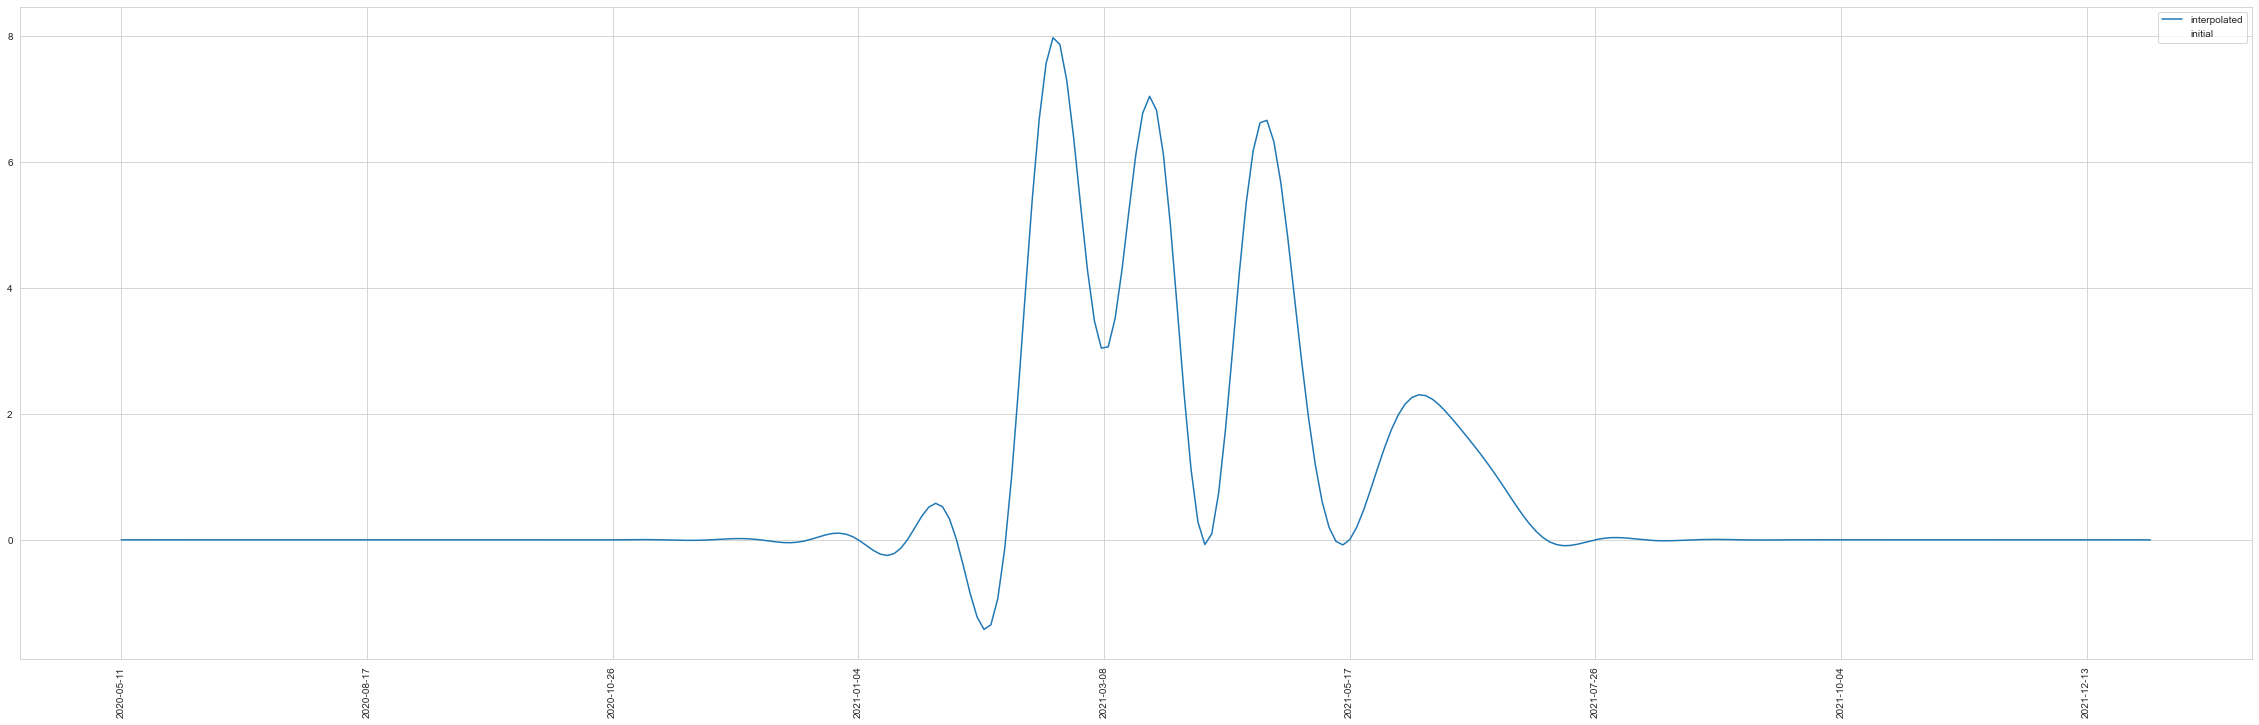

In [88]:
%matplotlib inline

fig, axs = plt.subplots(1, 1, figsize=(40, 12))
x = beta_data['date']
y = beta_data['num_sequences']

# workaround by creating linespace for length of your x axis
x_new = np.linspace(0, len(x), 300)
a_BSpline = make_interp_spline(
    [i for i in range(0, len(x))],
    y,
    k=5,
)
y_new = a_BSpline(x_new)

# plot this new plot with linestyle = "-"
axs.plot(
    x_new[:-5], # removing last 5 entries to remove noise, because interpolation outputs large values at the end.
    y_new[:-5],
    "-",
    label="interpolated"
)

# to get the date on x axis we will keep our previous plot but linestyle will be None so it won't be visible
x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="initial")
xt = [x[i] for i in range(0,len(x),5)]
plt.xticks(xt,rotation="vertical")
plt.legend()
fig.show()

C:\Users\julia\AppData\Local\Temp/ipykernel_18052/2301677059.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


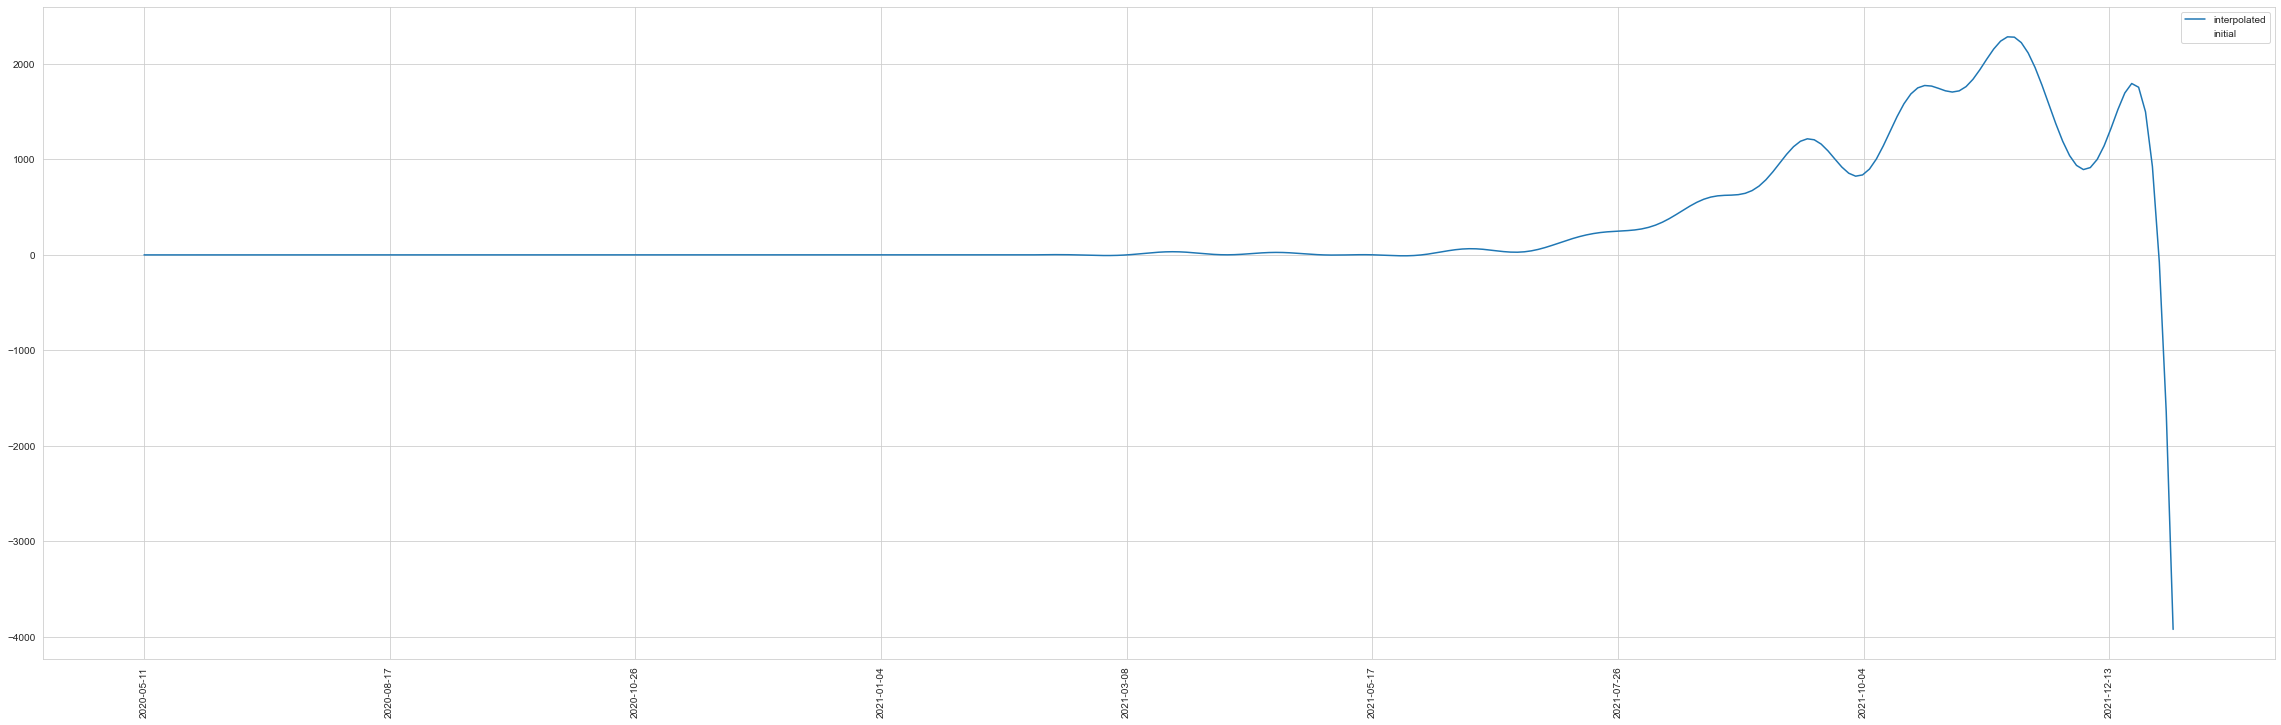

In [89]:
%matplotlib inline

fig, axs = plt.subplots(1, 1, figsize=(40, 12))
x = delta_data['date']
y = delta_data['num_sequences']

# workaround by creating linespace for length of your x axis
x_new = np.linspace(0, len(x), 300)
a_BSpline = make_interp_spline(
    [i for i in range(0, len(x))],
    y,
    k=5,
)
y_new = a_BSpline(x_new)

# plot this new plot with linestyle = "-"
axs.plot(
    x_new[:-5], # removing last 5 entries to remove noise, because interpolation outputs large values at the end.
    y_new[:-5],
    "-",
    label="interpolated"
)

# to get the date on x axis we will keep our previous plot but linestyle will be None so it won't be visible
x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="initial")
xt = [x[i] for i in range(0,len(x),5)]
plt.xticks(xt,rotation="vertical")
plt.legend()
fig.show()

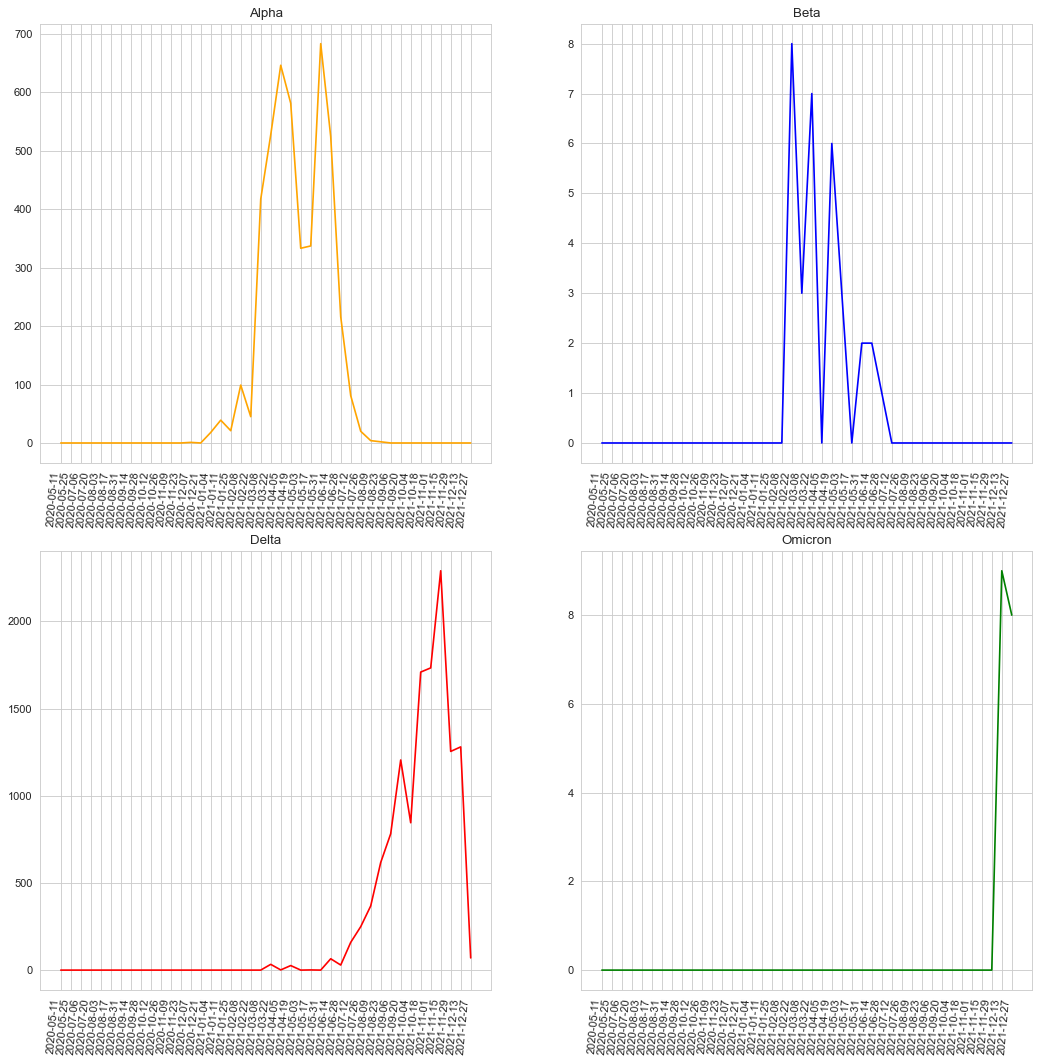

In [94]:
fig = plt.figure(figsize=(16, 16), dpi=80)
plt.rc('axes', axisbelow=True)
axA = fig.add_subplot(2,2,1)
axB = fig.add_subplot(2,2,2)
axD = fig.add_subplot(2,2,3)
axO = fig.add_subplot(2,2,4)

xA = alpha_data['date']
yA = alpha_data['num_sequences']
axA.plot(xA,yA, color='orange', label='ALPHA')
axA.set_title('Alpha')
labels = axA.get_xticklabels()
plt.setp(labels, rotation=85, horizontalalignment='right')

xB = beta_data['date']
yB = beta_data['num_sequences']
axB.plot(xB,yB,color='blue', label='BETA')
axB.set_title('Beta')
labels = axB.get_xticklabels()
plt.setp(labels, rotation=85, horizontalalignment='right')

xD = delta_data['date']
yD = delta_data['num_sequences']
axD.plot(xD,yD, color='red', label='DELTA')
axD.set_title('Delta')
labels = axD.get_xticklabels()
plt.setp(labels, rotation=85, horizontalalignment='right')

xO = omicron_data['date']
yO = omicron_data['num_sequences']
axO.plot(xO,yO, color='green', label='OMICRON')
axO.set_title('Omicron')
labels = axO.get_xticklabels()
plt.setp(labels, rotation=85, horizontalalignment='right')


plt.savefig('variants.jpg')
plt.show()

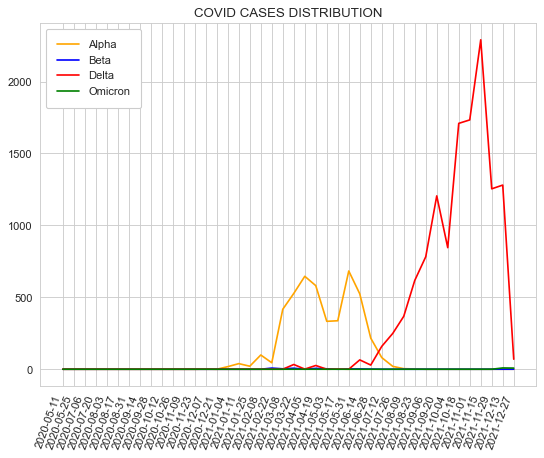

In [91]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(1,1,1)
plt.rc('axes', axisbelow=True)

xA = alpha_data['date']
yA = alpha_data['num_sequences']
ax.plot(xA,yA, color='orange', label='Alpha')

xB = beta_data['date']
yB = beta_data['num_sequences']
ax.plot(xB,yB, color='blue', label='Beta')

xD = delta_data['date']
yD = delta_data['num_sequences']
ax.plot(xD,yD, color='red', label='Delta')

xO = omicron_data['date']
yO = omicron_data['num_sequences']
ax.plot(xO,yO, color='green', label='Omicron')

ax.legend(fancybox=True, framealpha=1, shadow=False, borderpad=1)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=70, horizontalalignment='right')
ax.set_title('COVID CASES DISTRIBUTION')

plt.savefig('all_variants.jpg')
plt.show()

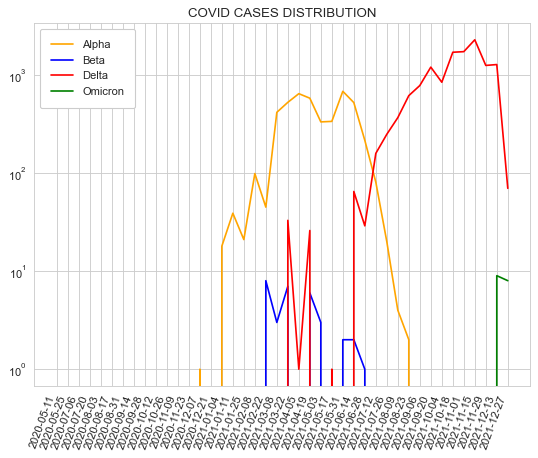

In [92]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(1,1,1)
plt.rc('axes', axisbelow=True)

xA = alpha_data['date']
yA = alpha_data['num_sequences']
ax.plot(xA,yA, color='orange', label='Alpha')

xB = beta_data['date']
yB = beta_data['num_sequences']
ax.plot(xB,yB, color='blue', label='Beta')

xD = delta_data['date']
yD = delta_data['num_sequences']
ax.plot(xD,yD, color='red', label='Delta')

xO = omicron_data['date']
yO = omicron_data['num_sequences']
ax.plot(xO,yO, color='green', label='Omicron')

ax.legend(fancybox=True, framealpha=1, shadow=False, borderpad=1)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=70, horizontalalignment='right')
ax.set_title('COVID CASES DISTRIBUTION (log scaled)')
plt.yscale('log')

plt.savefig('all_variants_log.jpg')
plt.show()